In [1]:
import re
import pandas as pd
import numpy as np
from starfit import Single, Multi
from pathlib import Path
import socket
import matplotlib.pyplot as plt
from starfit.utils import find_data
from starfit.autils.stardb import StarDB
from starfit.autils.abusets import SolAbu
from astropy import constants as const
from astropy import units
coeff = (0.6 * (const.G * const.M_sun) / (12e3 * units.m * (const.c)**2)).value

from solar_rs import element2z_dict, z2element_dict, \
    logeps_sols, logeps_solr, logeps_sols_dict, logeps_solr_dict
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

hostname = socket.gethostname()
if hostname == 'jerome-linux':
    datadir = Path('/home/jerome/Documents/GitHub')
elif hostname == 'sage2020':
    datadir = Path('/home/jiangrz/hdd23')
datapath = datadir/Path('Data/rproc/heavy_element_enhanced_stars_write_err.csv')
stardir = datadir/Path('Data/rproc/star')
lightdir = datadir/Path('Data/Raw/MPs/1_Li/Stars')
resdir = Path('result/')
logeps_df = pd.read_csv(datapath)
database = [
    'rproc.wu.star.el.y.stardb.xz', 
    'rproc.just15.star.el.y.stardb.xz', 
    'nuc.lc18.star.el.y.stardb.xz', 
    'znuc2012.S4.star.el.y.stardb.gz', 
]
z_exclude_lc18 = np.append(np.arange(43, 54), np.arange(61, 80)).tolist()
z_exclude_s4 = [21, 24, 29, 30]

In [2]:
logeps_path = stardir/'../logeps.csv'
logeps_df = pd.read_csv(logeps_path)
star_name = 'J0804+5740'
star_idx = logeps_df.loc[:, 'objname'] == star_name
logeps_df.loc[star_idx, :]

,objname,FeH,eFeH,Li,C,Na,Mg,Si,Ca,Sc,...,eNd,eSm,eEu,eGd,eDy,eHo,eHf,eOs,ePb,eTh
17,J0804+5740,-2.47,0.09,NaN,-0.39,4.016413,5.588059,5.561746,4.119589,0.816181,...,0.08357,0.068091,0.120416,0.071414,0.096437,NaN,0.114455,0.188944,NaN,NaN


In [3]:
for _, _stardata in logeps_df.iterrows():
    if _stardata.objname.startswith(star_name):
        star_data = _stardata.values
        star_name = star_data[0]
star_logeps = star_data[3:34]
flag_detect = ~pd.isna(star_logeps)
star_logeps = star_data[3:34][flag_detect]
star_elogeps = star_data[34:][flag_detect]
star_el = logeps_df.columns.values[3:34][flag_detect]
star_Z = np.array([element2z_dict[_] for _ in star_el])
star_el_dict = {
    z2element_dict[_z]: 
    star_logeps[_idx] for _idx, _z in enumerate(star_Z)
}
logeps_solr_scaled = logeps_solr - (
    logeps_solr_dict['Eu'] - star_el_dict['Eu'])
logeps_sols_scaled = logeps_sols - (
    logeps_sols_dict['Ba'] - star_el_dict['Ba'])

plot_Z = [element2z_dict[_] for _ in logeps_solr_dict.keys()]
flag_heavy = star_Z > 30
star_logeps_heavy = star_logeps[flag_heavy]
star_elogeps_heavy = star_elogeps[flag_heavy]
star_Z_heavy = star_Z[flag_heavy]
flag_star = np.in1d(plot_Z, star_Z)
solr_detect = logeps_solr_scaled[flag_star]
sols_detect = logeps_sols_scaled[flag_star]

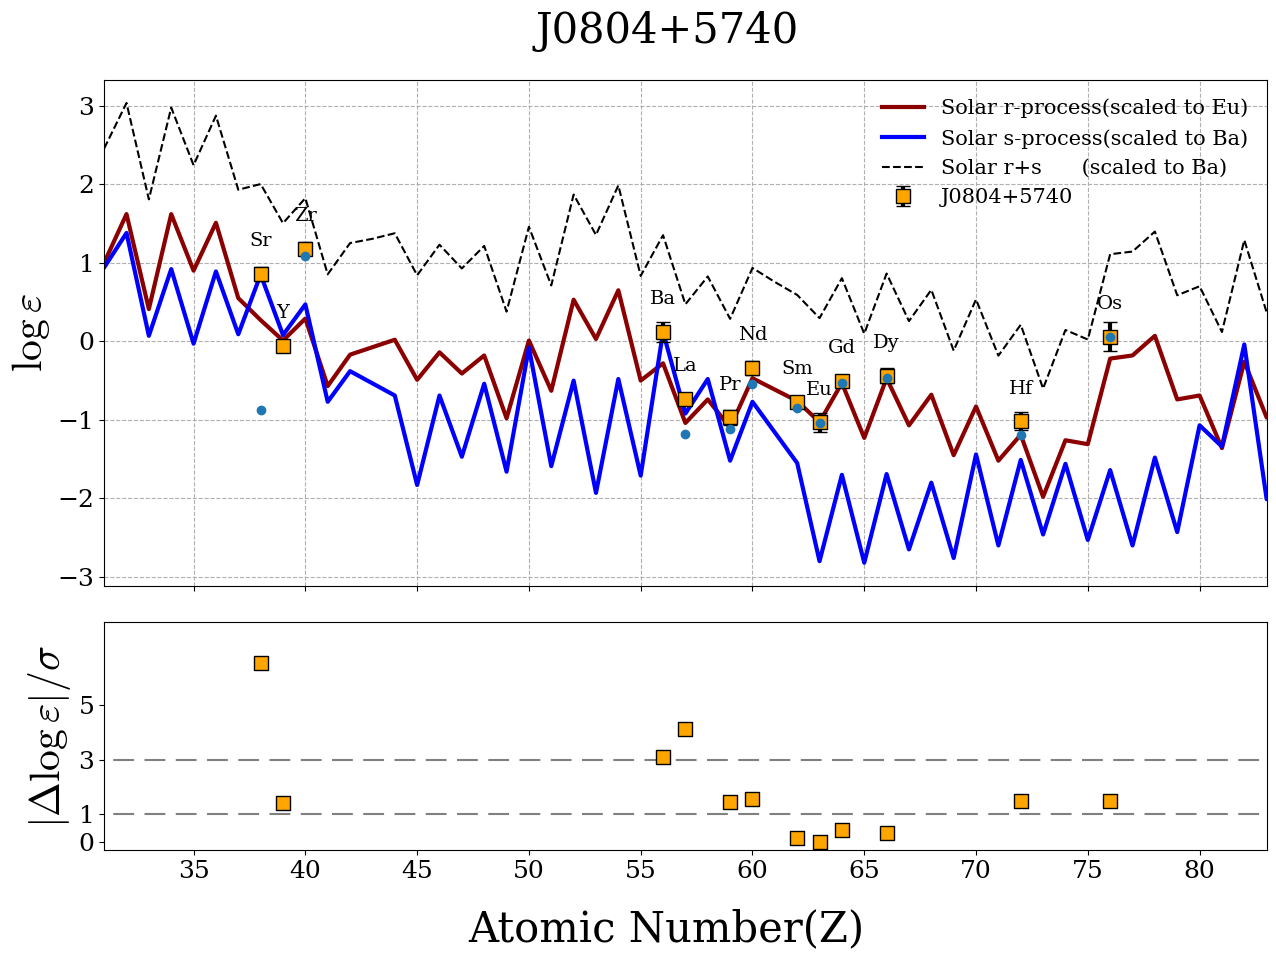

In [4]:
from util_plot import AbundPlot
aplt = AbundPlot(datafile='logeps.csv')
star_name='J'+'0804'
fig = aplt.plot(star_name=star_name, fname=None, bbox_inches='tight')
# print(aplt.redchisqr(star_name=star_name))
star_logeps_nos = np.ma.log10(
    np.array(
        np.power(10, star_logeps_heavy) - np.power(10, sols_detect), 
        dtype=float))
axes = fig.get_axes()
axes[0].scatter(star_Z_heavy, star_logeps_nos, zorder=5, )

In [3]:
from util_plot import AbundPlot
aplt = AbundPlot(datafile='logeps.csv')
star_name='J'+'0804'
aplt.load_star(star_name)

[[ 0.69821723 -0.04891968]
 [-0.24685463  0.33576688]]


In [5]:
np.dot(np.array([[ 0.69821723, -0.04891968],
 [-0.24685463,  0.33576688]]), 
 np.array([[1], [1]]))

array([[0.64929755],
       [0.08891225]])

In [7]:
np.array([1, 1]).reshape(-1 ,1)

array([[1],
       [1]])